# Country_wide_covid19_dataset

In [2]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset
cov=pd.read_csv('country_wide_covid19_dataset.csv',parse_dates=["Date"])
pop=pd.read_csv('population_structure_by_age_per_contry.csv')

In [4]:
cov

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [5]:
pop

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [6]:
#checking the shape of dataset
cov.shape

(6603, 9)

There are 6603 rows and 9 columns in this dataset

In [7]:
#checking all the columns present in this dataset
cov.columns

Index(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases'],
      dtype='object')

In [8]:
#checking the data types of these columns
cov.dtypes

Date                   datetime64[ns]
Country                        object
Population                      int64
Total Tests                   float64
Total Cases                   float64
Total Deaths                  float64
Total Recovered               float64
Serious or Critical           float64
Active Cases                  float64
dtype: object

There is only one categorical feature present in this dataset :  'Country' and rest are Numerical features except 'Date' which is of datetime datatype

In [9]:
#checking the null values
cov.isnull().values.any()

True

Yes there are few null values present in this dataset

In [10]:
cov.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

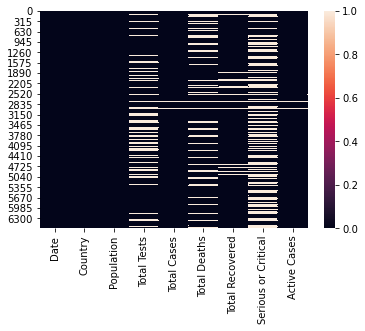

In [11]:
#checking null values using heatmap
sns.heatmap(cov.isnull())

From this it's observed that missing values are present in "Total Tests","Total Cases","Total Deaths","Total Recovered","Serious or Critical" and "Active Cases". So we will impute the missing values

In [12]:
#imputing the missing value  with mean of the corresponding column

In [13]:
cov['Total Tests']=cov['Total Tests'].replace(np.NaN,cov['Total Tests'].mean())
cov['Total Cases']=cov['Total Cases'].replace(np.NaN,cov['Total Cases'].mean())
cov['Total Deaths']=cov['Total Deaths'].replace(np.NaN,cov['Total Deaths'].mean())
cov['Total Recovered']=cov['Total Recovered'].replace(np.NaN,cov['Total Recovered'].mean())
cov['Serious or Critical']=cov['Serious or Critical'].replace(np.NaN,cov['Serious or Critical'].mean())
cov['Active Cases']=cov['Active Cases'].replace(np.NaN,cov['Active Cases'].mean())
cov

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3.722145e+06,738792.0,39014.000000,68269.000000,13551.00000,631509.0
1,2020-04-18,Russia,145927292,1.831892e+06,36793.0,313.000000,3057.000000,8.00000,33423.0
2,2020-04-18,Spain,46752703,9.302300e+05,194416.0,20043.000000,74797.000000,7371.00000,99576.0
3,2020-04-18,Brazil,212380932,6.298500e+04,36722.0,2361.000000,14026.000000,6634.00000,20335.0
4,2020-04-18,UK,67844241,4.604370e+05,114217.0,15464.000000,5855.424185,1559.00000,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0
6599,2020-05-18,Western Sahara,595462,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0
6600,2020-05-18,Anguilla,14987,2.167252e+05,3.0,1416.252096,3.000000,386.74836,0.0
6601,2020-05-18,Lesotho,2140235,2.167252e+05,1.0,1416.252096,5855.424185,386.74836,1.0


In [14]:
#Again checking for missing values
cov.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

There are no more null values left in this dataset

In [15]:
#Statistical Summary
cov.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,6.603000e+03,6.603000e+03,6603.000000,6603.000000,6603.000000,6.603000e+03
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,1.411537e+08,6.934856e+05,8.828521e+04,5990.992214,22955.519135,1309.473245,6.511732e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,4.733000e+03,8.000000e+01,8.000000,29.000000,7.000000,2.700000e+01
50%,6.859926e+06,5.419500e+04,6.320000e+02,55.000000,253.000000,137.000000,2.840000e+02
75%,2.546422e+07,2.167252e+05,5.222500e+03,1416.252096,1786.500000,386.748360,2.230500e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


In columns:Total Deaths,Total Recovered,Serious or Critical,Active Cases mean is greater than median and so in these attributes data is right skewed.

    
In columns:Total Deaths,Total Recovered,Serious or Critical there is a difference between 75% and max and so outliers are present in these columns.

In [16]:
#Checking the correlation between the columns
cov.corr()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Population,1.000000,0.223735,0.225844,0.176773,0.309361,0.170461,0.179359
Total Tests,0.223735,1.000000,0.896328,0.803680,0.795205,0.728773,0.853809
Total Cases,0.225844,0.896328,1.000000,0.930952,0.821121,0.881620,0.975361
Total Deaths,0.176773,0.803680,0.930952,1.000000,0.794887,0.822177,0.879732
Total Recovered,0.309361,0.795205,0.821121,0.794887,1.000000,0.707686,0.687265
Serious or Critical,0.170461,0.728773,0.881620,0.822177,0.707686,1.000000,0.869204
Active Cases,0.179359,0.853809,0.975361,0.879732,0.687265,0.869204,1.000000


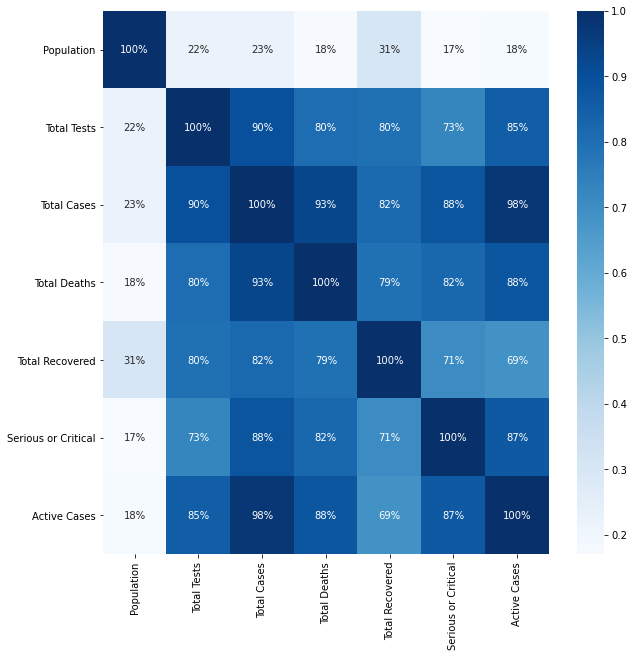

In [17]:
#checking correlation via visualization (heatmap)
plt.figure(figsize=(10,10))
sns.heatmap(cov.corr(),annot=True,fmt='.0%',cmap='Blues')
plt.show()

Text(0.5, 1.0, 'Correlation with target variable')

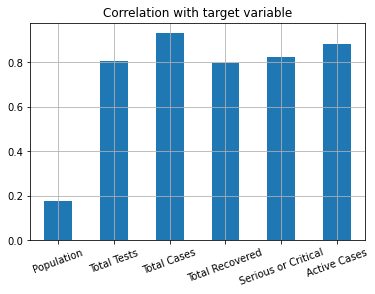

In [18]:
cov.drop('Total Deaths',axis=1).corrwith(cov['Total Deaths']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with target variable")

All attributes are positively correlated.

Population is the least correlated column with target variable

Total cases  and Active cases are highly correlated columns with target variable 

# Data Visualization

Univariate Analysis

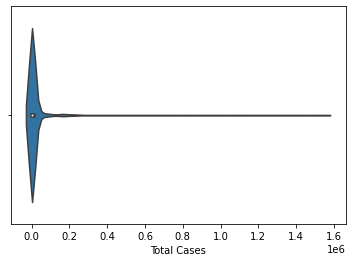

In [19]:
#Checking the (range of) values for Total cases
sns.violinplot(x='Total Cases',data=cov)
plt.show()

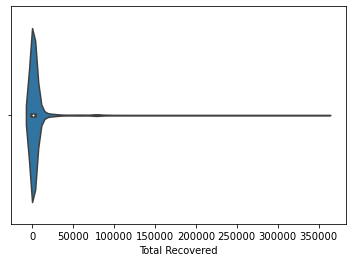

In [20]:
#Checking the (range of) values for Total Recovered 
sns.violinplot(x='Total Recovered',data=cov)
plt.show()

It can be observed that Total Recovery cases fall below the range 50000 while it gradually increases to  till 350000.

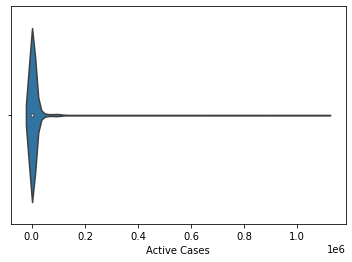

In [21]:
#Checking the (range of) values for Active cases
sns.violinplot(x='Active Cases',data=cov)
plt.show()

It can be observed that Most of the Active cases fall in the range 100000 while it gradually increases to  till 1000000.

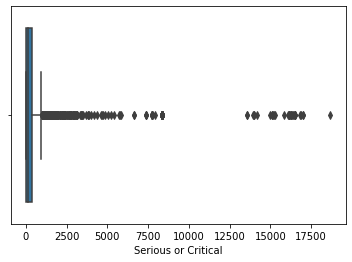

In [22]:
#Checking the (range of) values for Serious or Critical
sns.boxplot(x='Serious or Critical',data=cov)
plt.show()

Serious cases are very few i.e, below 1000 

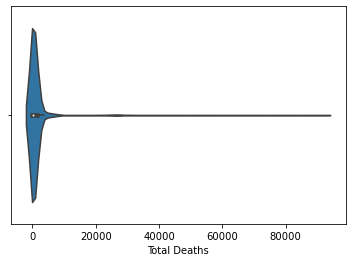

In [23]:
#Checking the (range of) values for Total Deaths
sns.violinplot(x='Total Deaths',data=cov)
plt.show()

It can be observed that majority of Total Death cases fall below the range 20000 while it gradually increases to  till 80000.

Bivariate Analysis

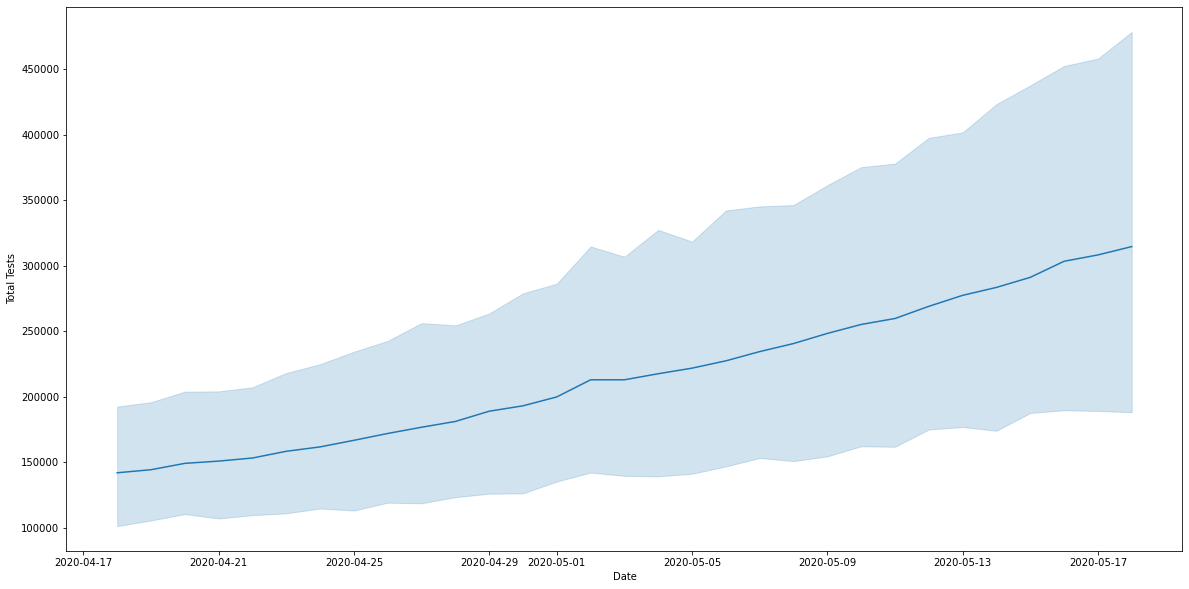

In [24]:
#Date vs Total Tests
plt.figure(figsize=(20,10))
sns.lineplot(data=cov,x='Date',y='Total Tests')
plt.show()

Total Tests also kept on increasing with time.

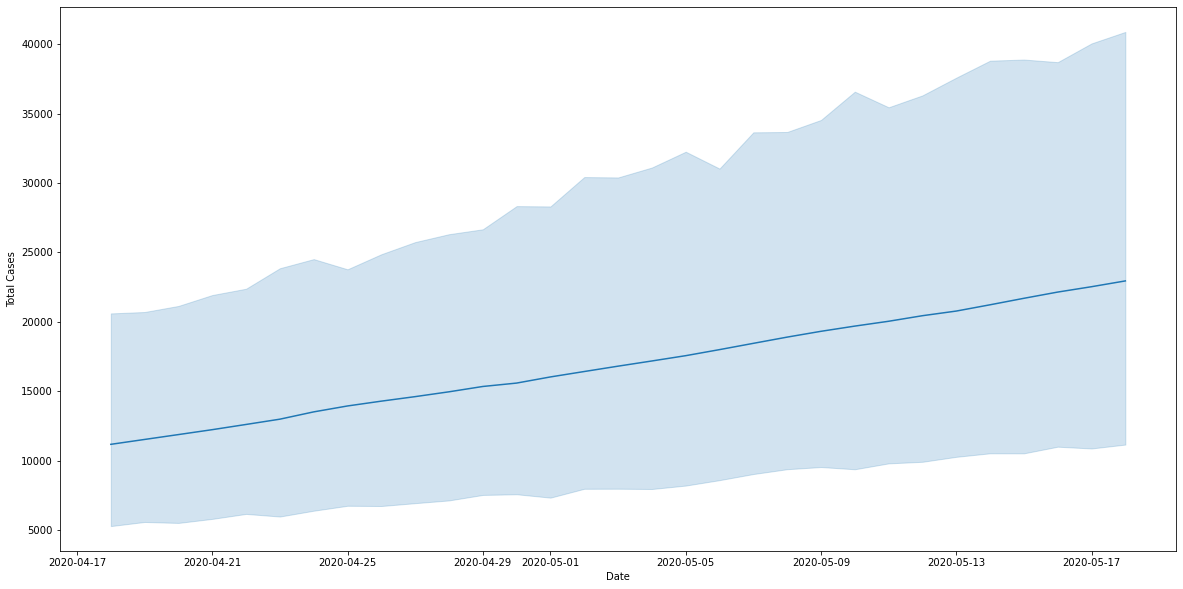

In [25]:
#Date vs Total cases
plt.figure(figsize=(20,10))
sns.lineplot(data=cov,x='Date',y='Total Cases')
plt.show()

Total Cases kept on increasing with time.

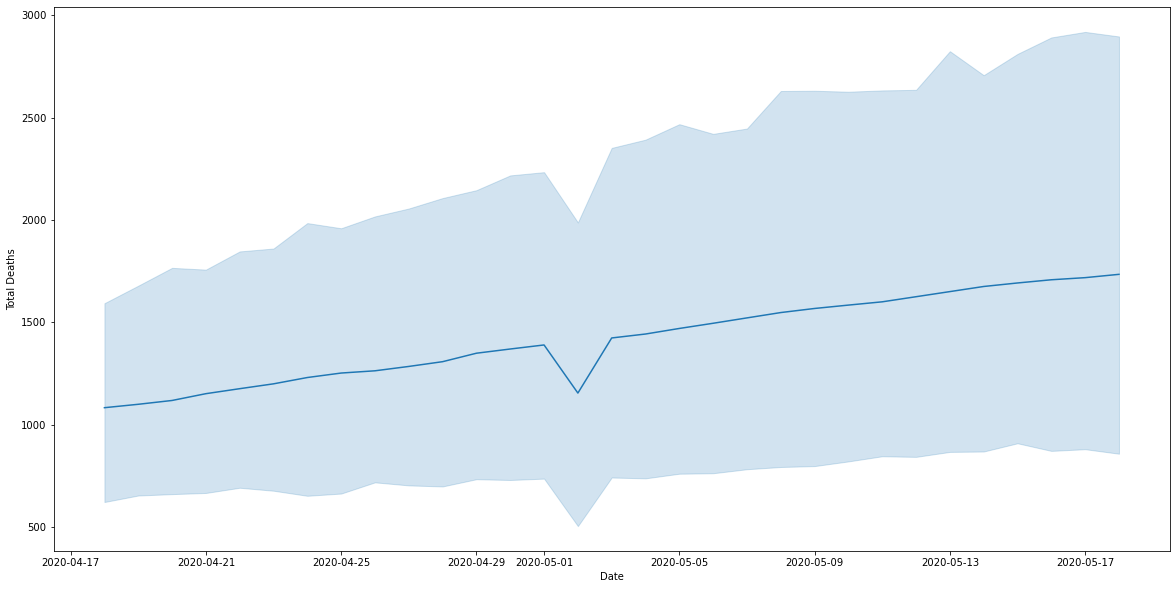

In [26]:
#Date vs Total Deaths
plt.figure(figsize=(20,10))
sns.lineplot(data=cov,x='Date',y='Total Deaths')
plt.show()

Total Deaths kept on increasing gradually with time with a little fall in value between 2020-05-01 to 020-05-05 and then it kept on increasing

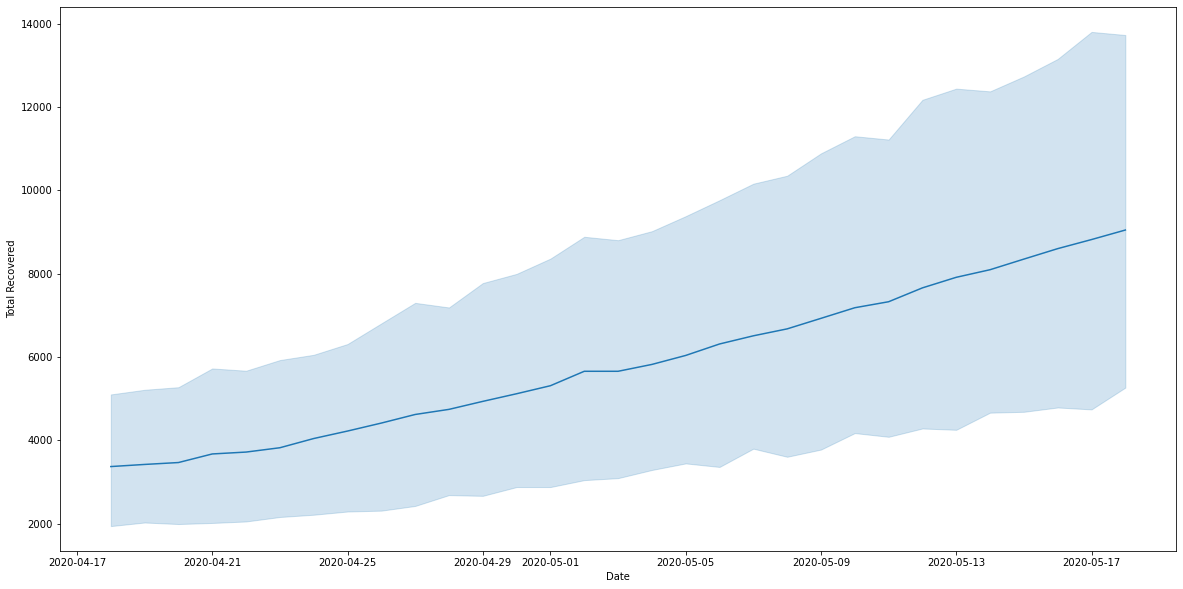

In [27]:
#Date vs Total Recovered
plt.figure(figsize=(20,10))
sns.lineplot(data=cov,x='Date',y='Total Recovered')
plt.show()

Recovery rate has increased at a good rate with time

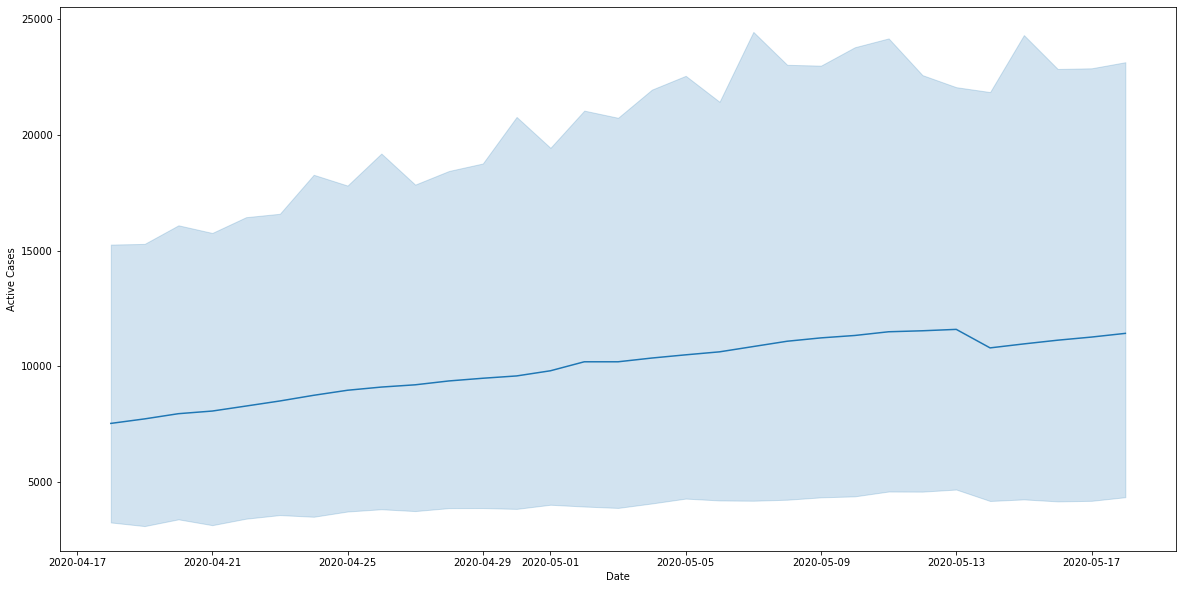

In [28]:
#Date vs Active Cases
plt.figure(figsize=(20,10))
sns.lineplot(data=cov,x='Date',y='Active Cases')
plt.show()

Active cases has kept on increasing with time

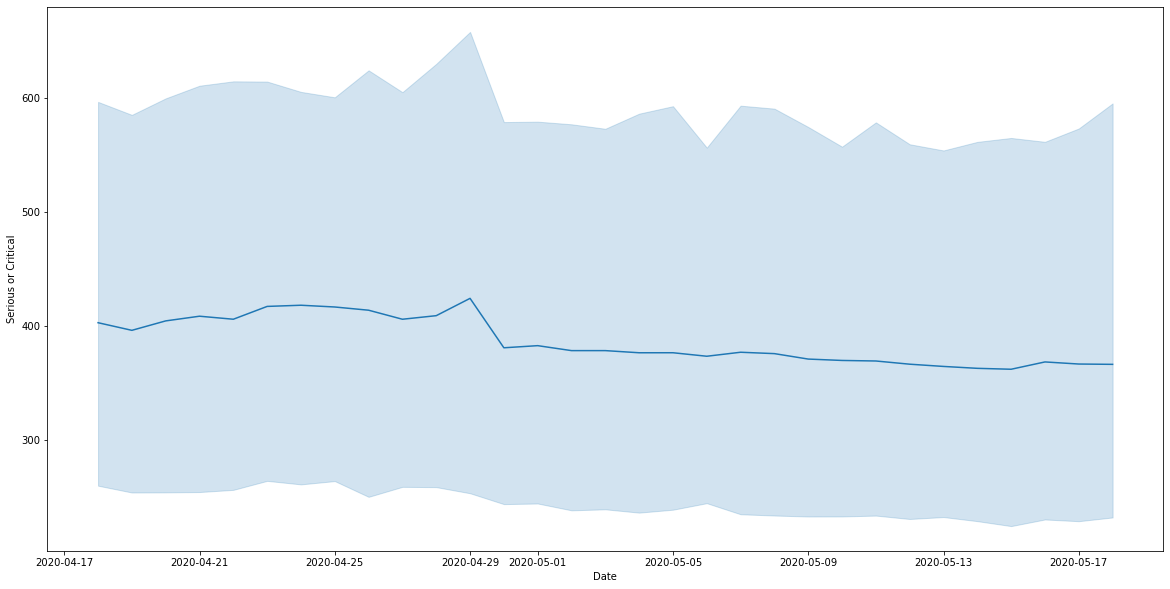

In [29]:
#Date vs Serious or Critical
plt.figure(figsize=(20,10))
sns.lineplot(data=cov,x='Date',y='Serious or Critical')
plt.show()

There has been a decrease in Serious cases with time.

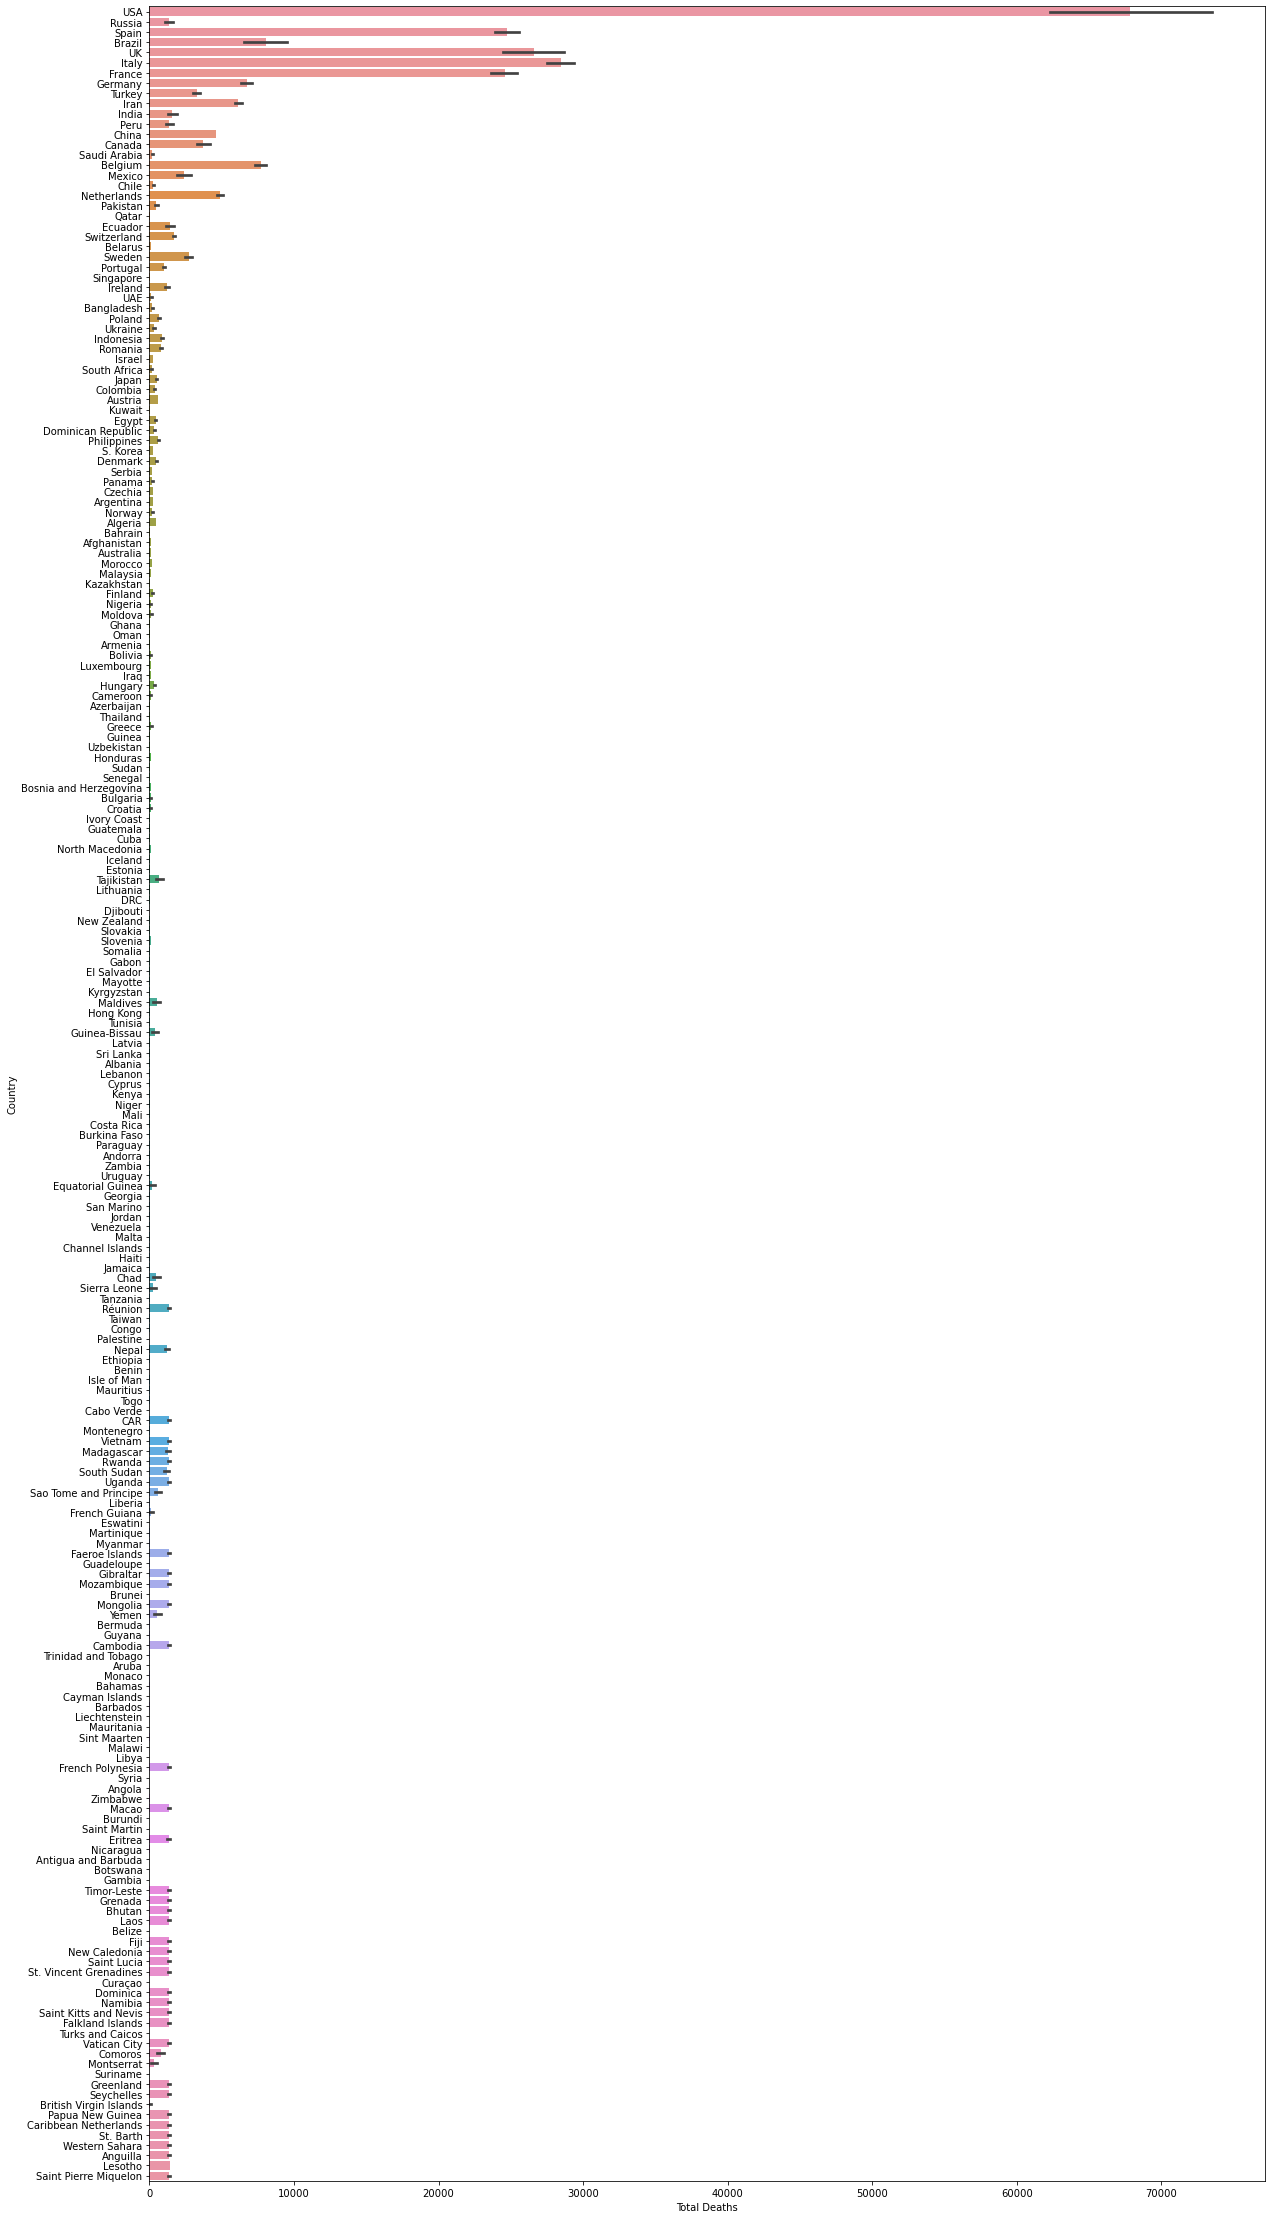

In [30]:
#Deaths vs Country
plt.figure(figsize=(20,40))
sns.barplot(y='Country',x='Total Deaths',data=cov)
plt.show()

Maximum death rates has been observed in USA while there are many countries with no deaths at all.

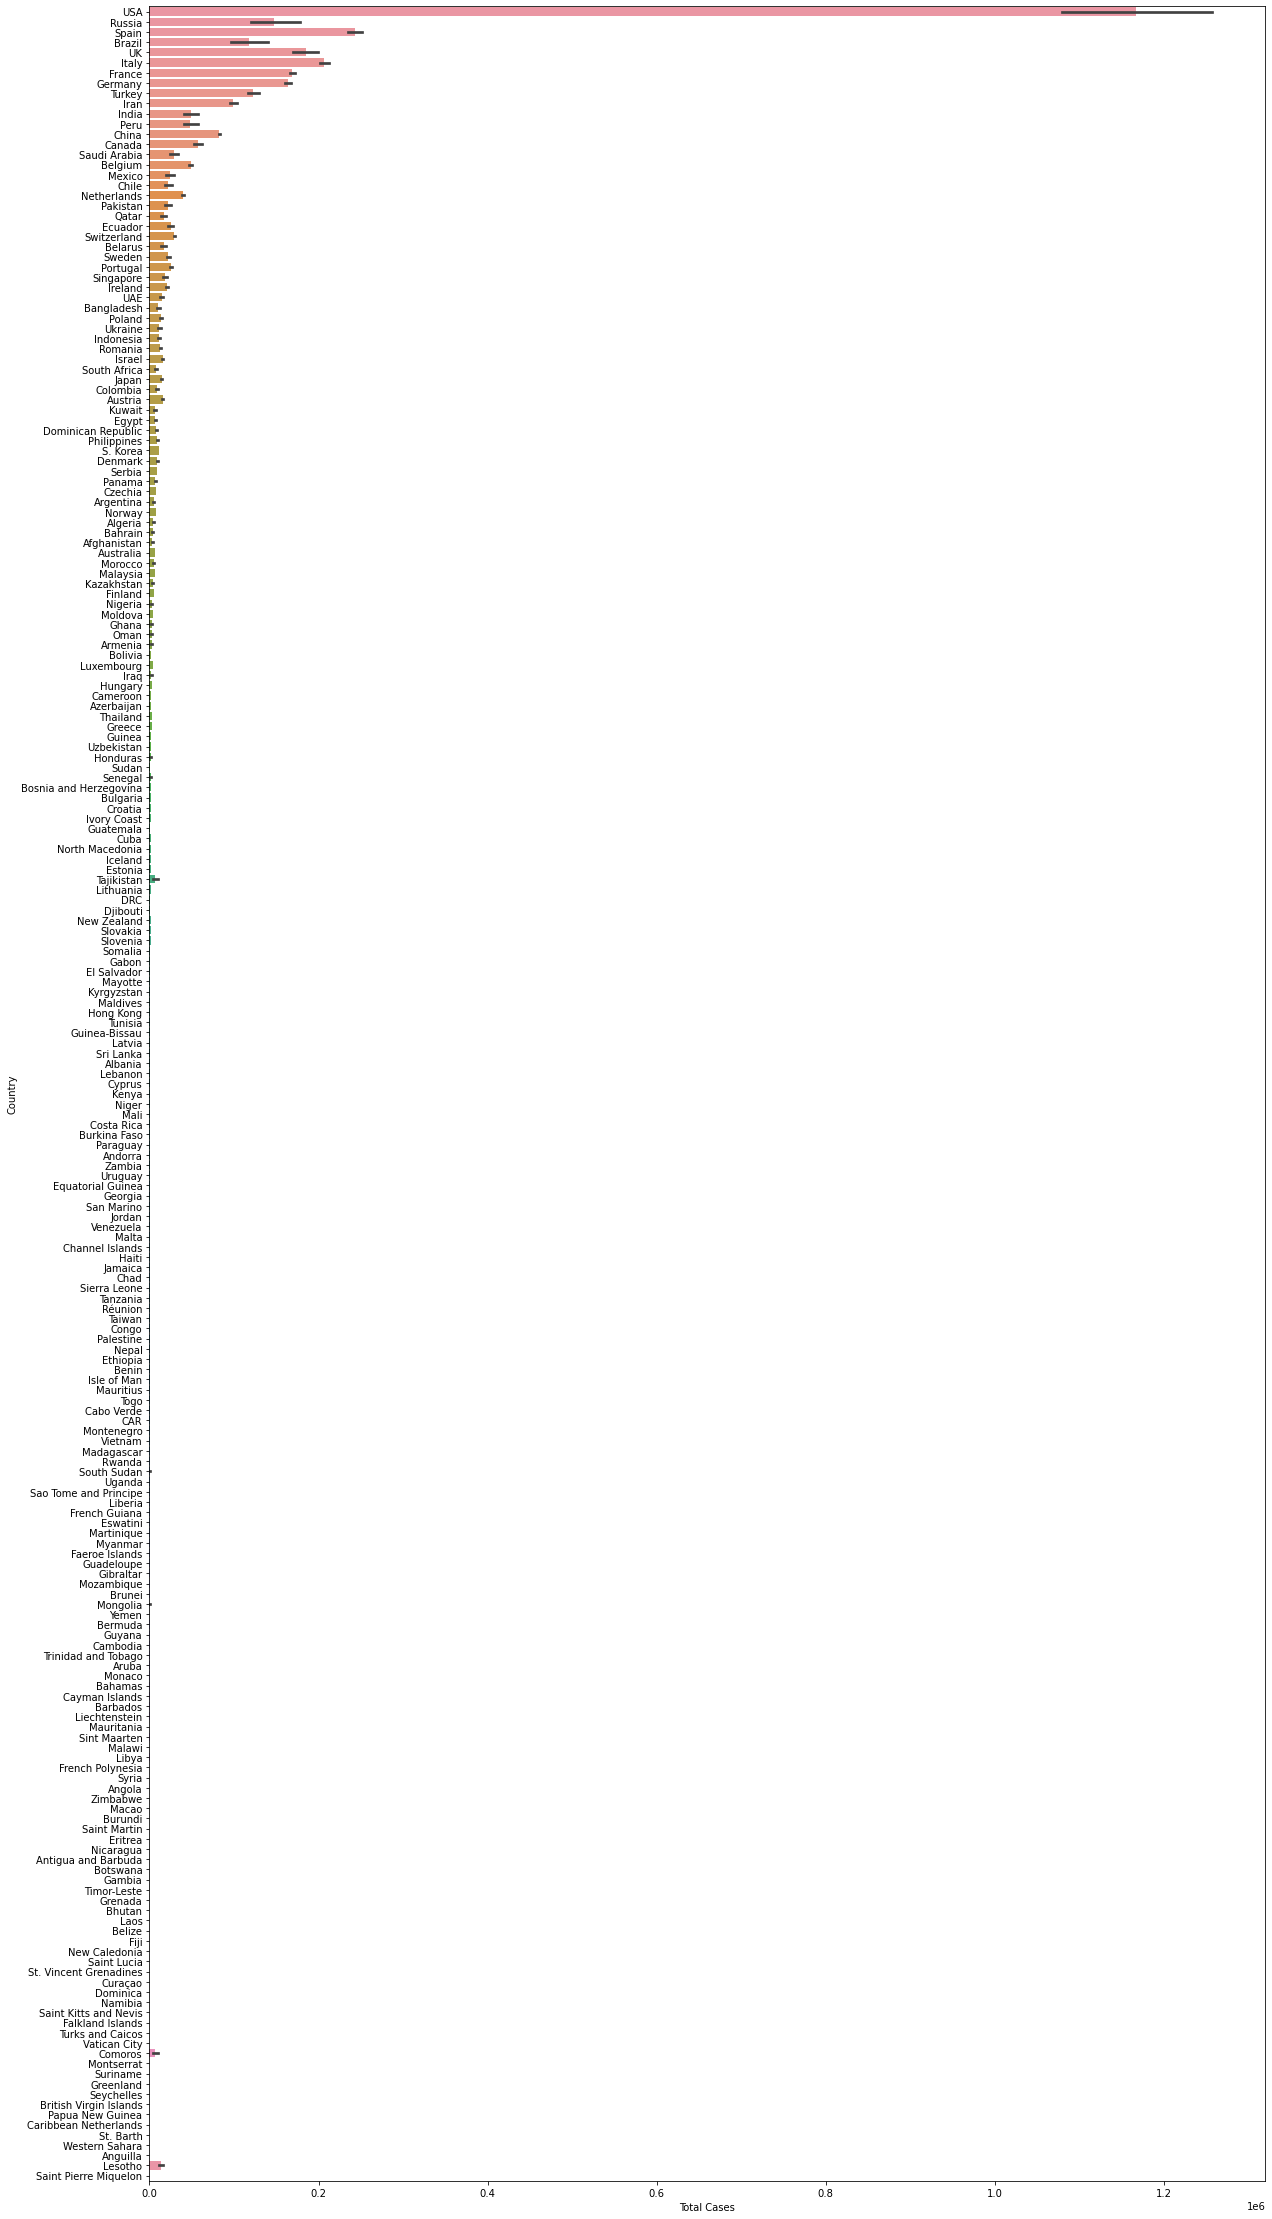

In [31]:
#Cases vs Country
plt.figure(figsize=(20,40))
sns.barplot(y='Country',x='Total Cases',data=cov)
plt.show()

Total cases can be seen Maximum in USA followed by Russia,Spain,Brazil.

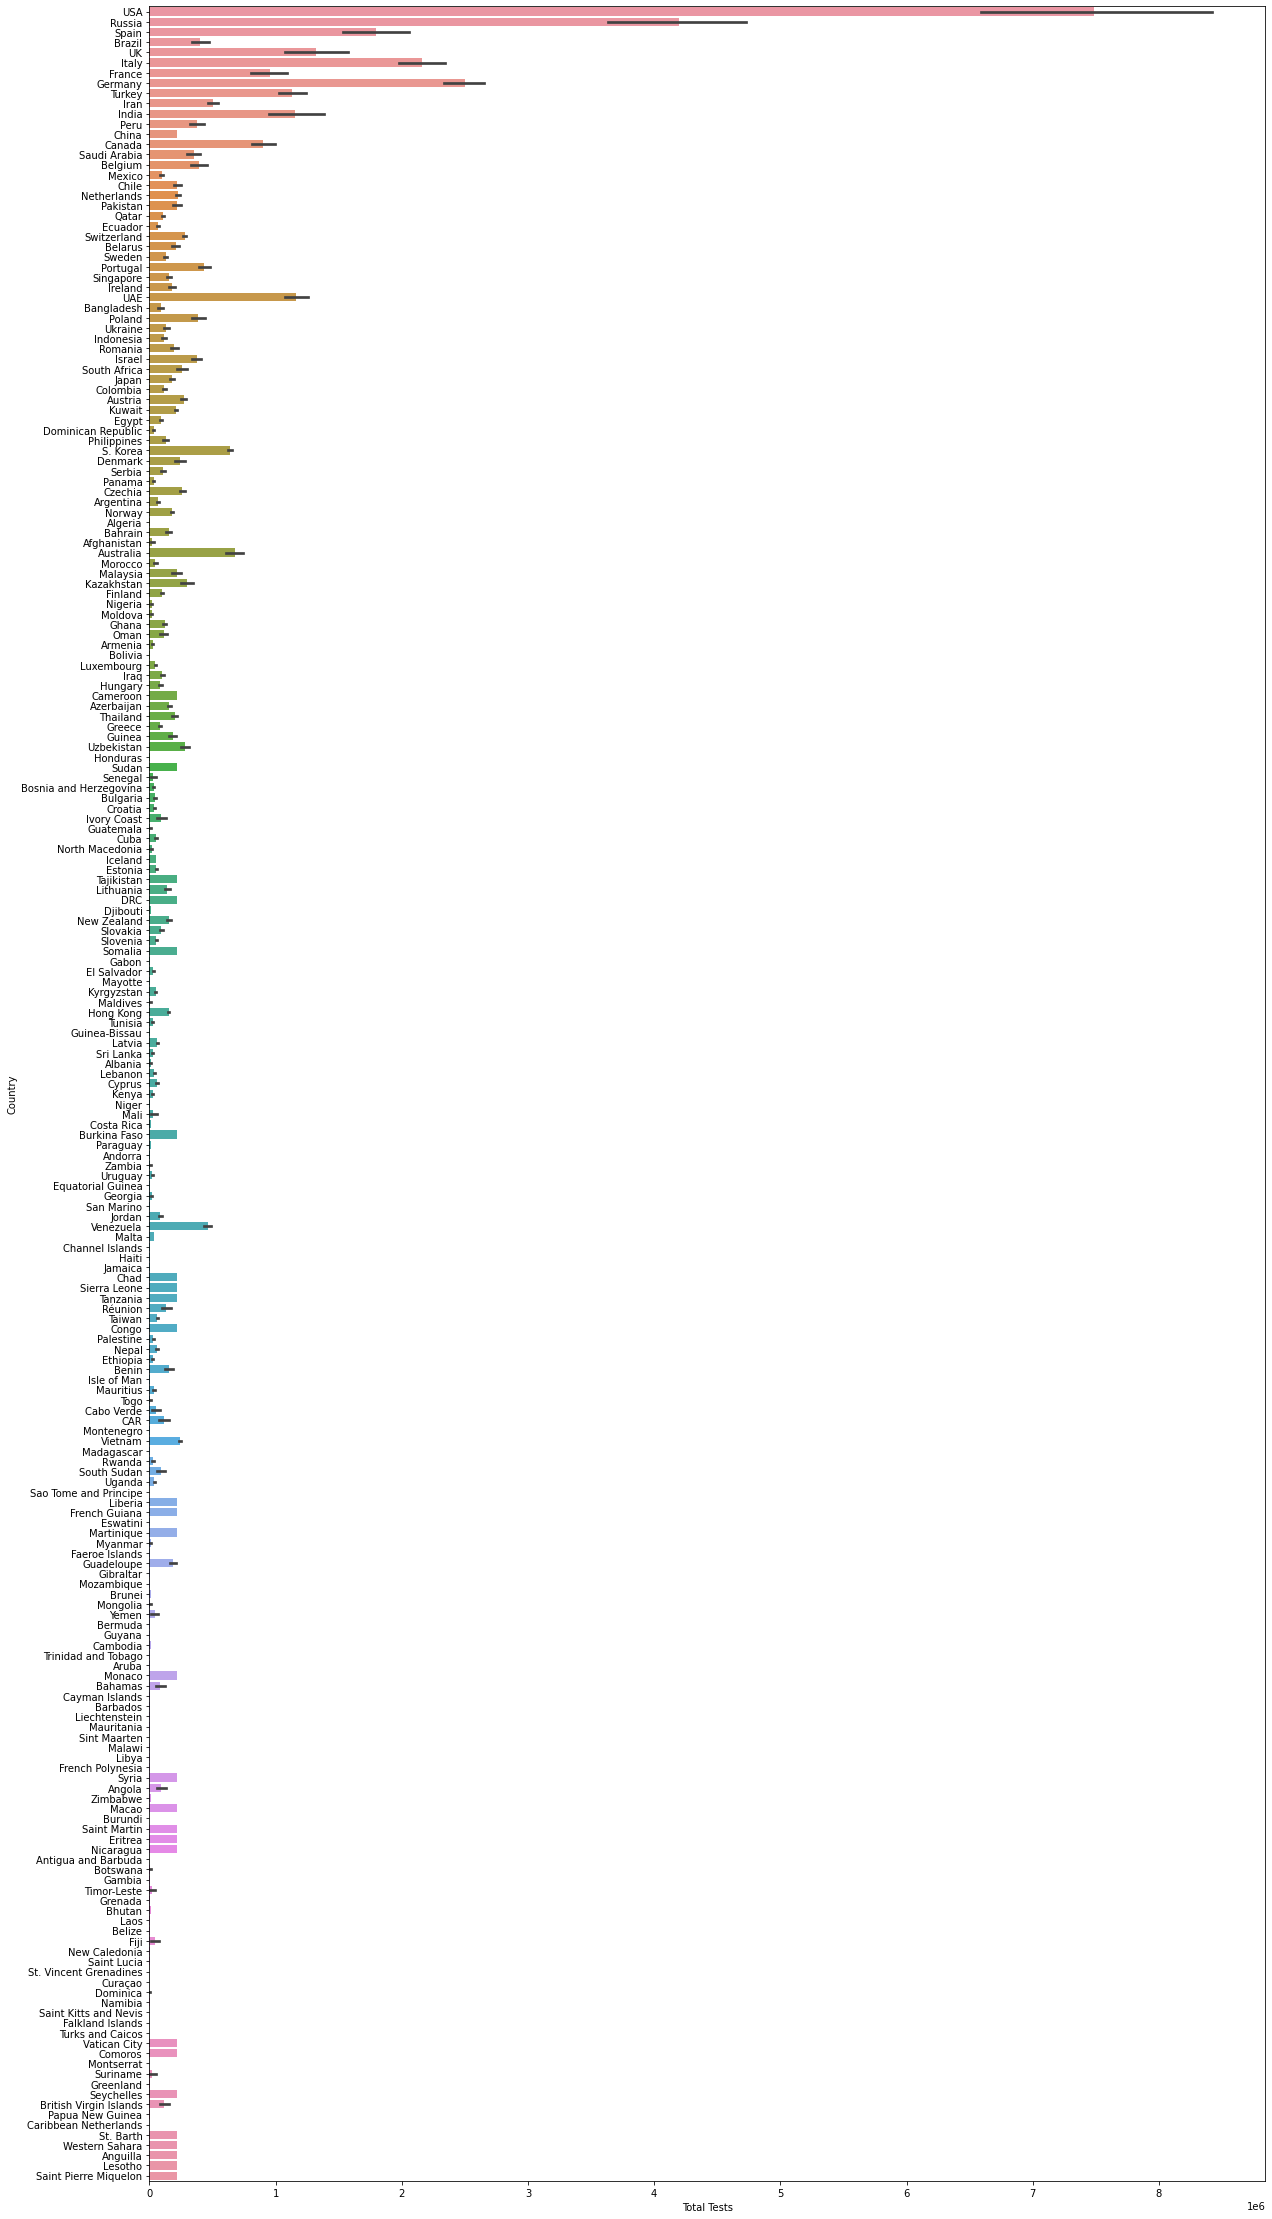

In [32]:
#Tests vs Country
plt.figure(figsize=(20,40))
sns.barplot(y='Country',x='Total Tests',data=cov)
plt.show()

 USA has done maximum tests followed by Russia,Spain ,Brazil.

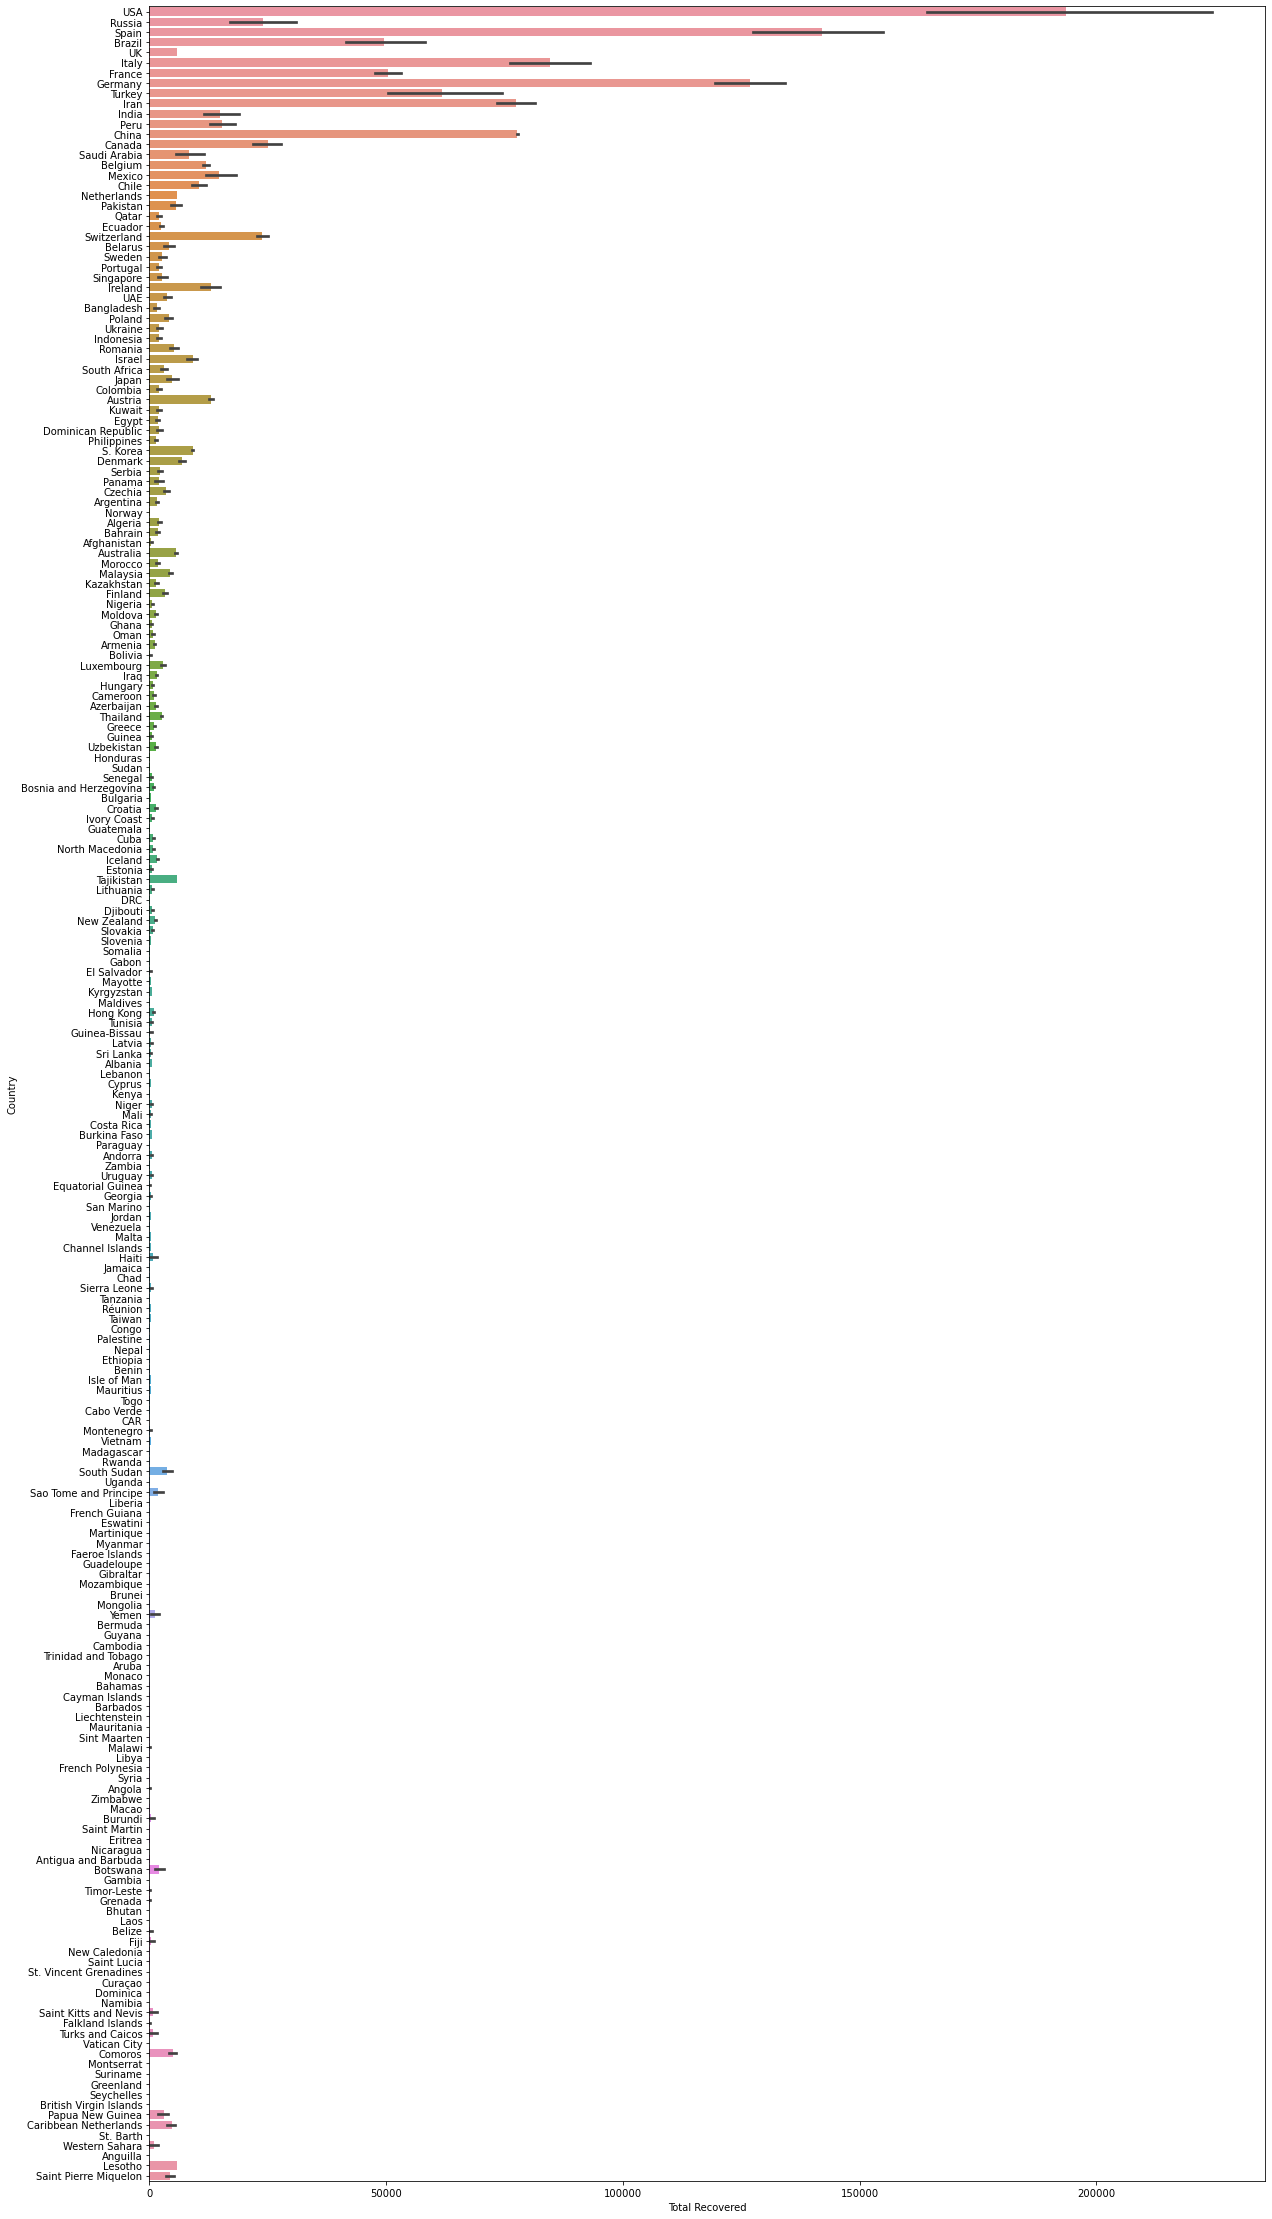

In [33]:
#Recovered vs Country
plt.figure(figsize=(20,40))
sns.barplot(y='Country',x='Total Recovered',data=cov)
plt.show()

USA has maximum recovery followed by Spain and Germany

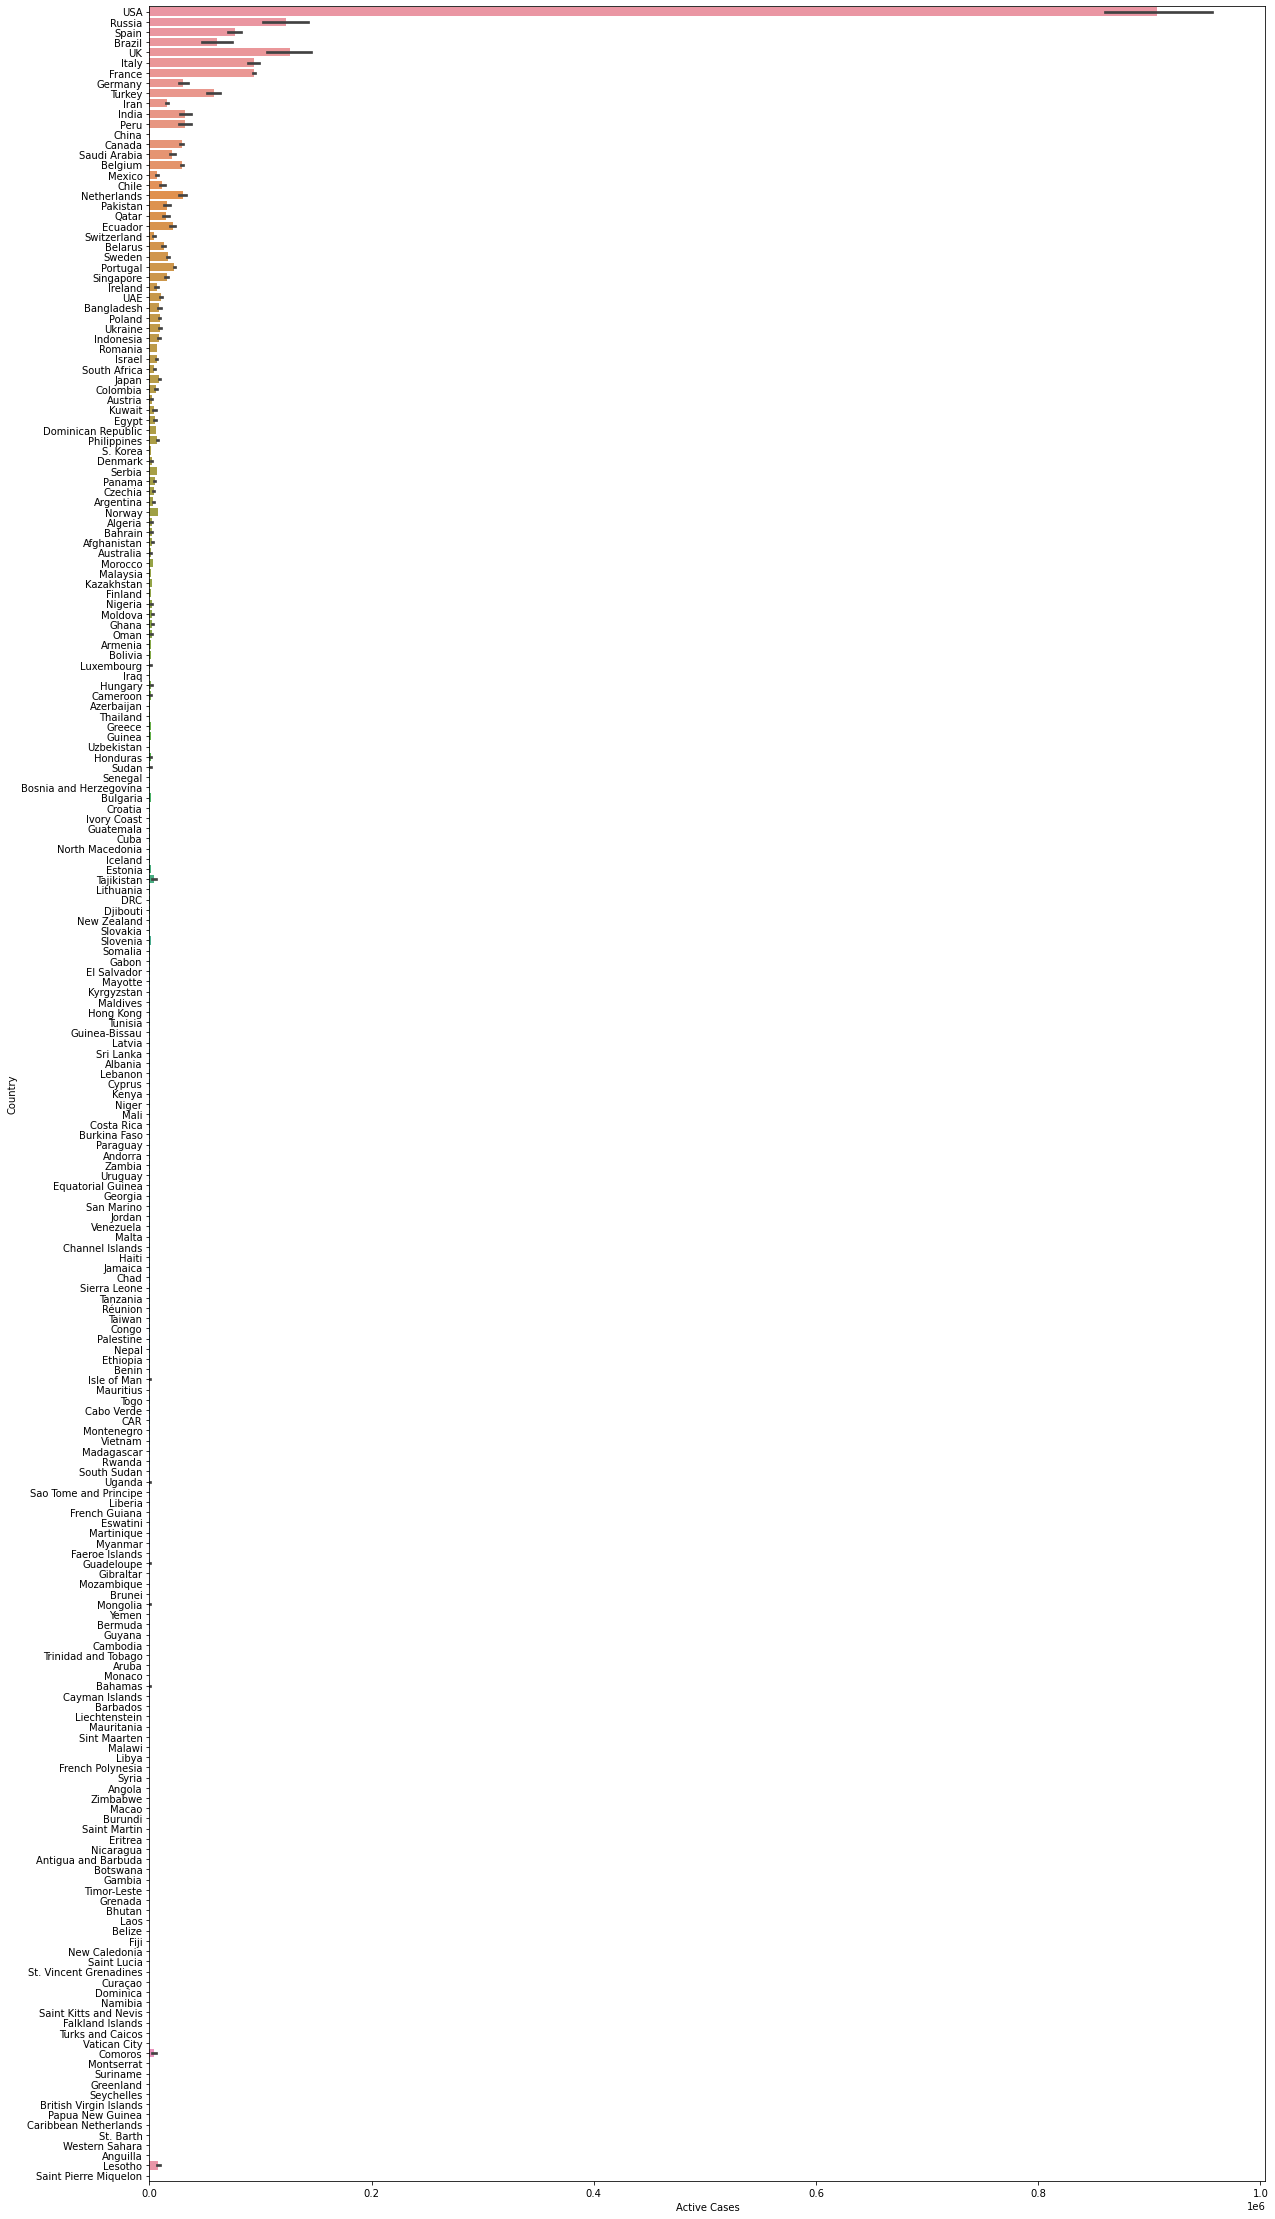

In [34]:
#Active cases vs Country
plt.figure(figsize=(20,40))
sns.barplot(y='Country',x='Active Cases',data=cov)
plt.show()

USA has maximum Active cases.

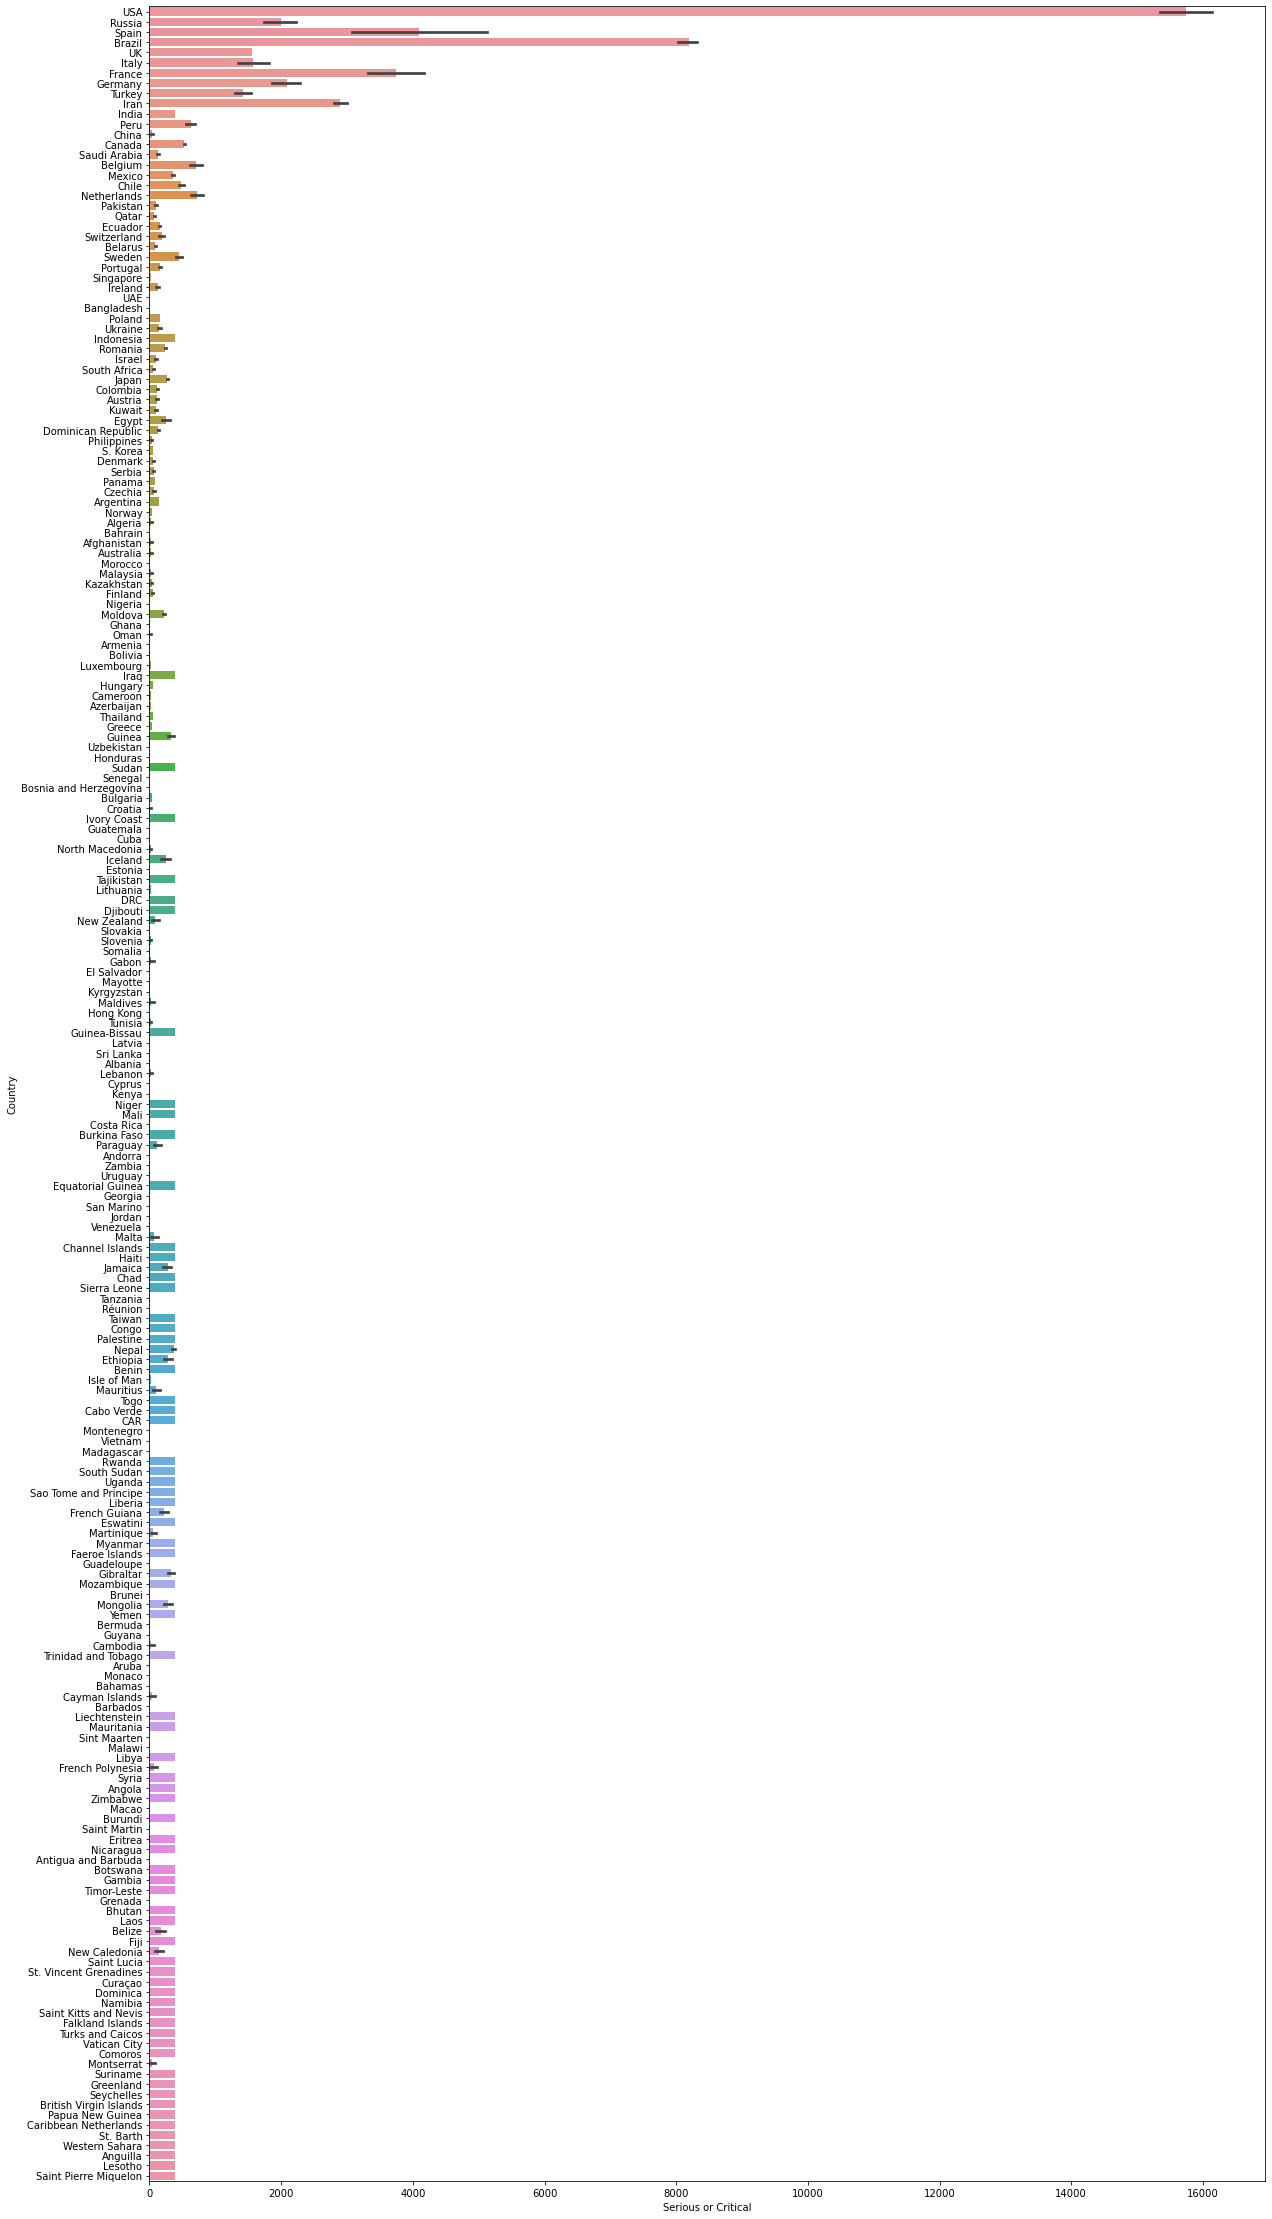

In [35]:
#Serious cases vs Country
plt.figure(figsize=(20,40))
sns.barplot(y='Country',x='Serious or Critical',data=cov)
plt.show()

USA,Brazil,Spain has maximum Serious cases

In [36]:
#Encoding the attributes
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
list1=['Date','Country']
for val in list1:
    cov[val]=le.fit_transform(cov[val].astype(str))

In [37]:
cov.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,0,201,330774664,3722145.0,738792.0,39014.0,68269.000000,13551.0,631509.0
1,0,158,145927292,1831892.0,36793.0,313.0,3057.000000,8.0,33423.0
2,0,180,46752703,930230.0,194416.0,20043.0,74797.000000,7371.0,99576.0
3,0,26,212380932,62985.0,36722.0,2361.0,14026.000000,6634.0,20335.0
4,0,200,67844241,460437.0,114217.0,15464.0,5855.424185,1559.0,98409.0


# Plotting the Outliers

Date                      AxesSubplot(0.125,0.657941;0.227941x0.222059)
Country                AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Population             AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Total Tests               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Total Cases            AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Total Deaths           AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Total Recovered              AxesSubplot(0.125,0.125;0.227941x0.222059)
Serious or Critical       AxesSubplot(0.398529,0.125;0.227941x0.222059)
Active Cases              AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

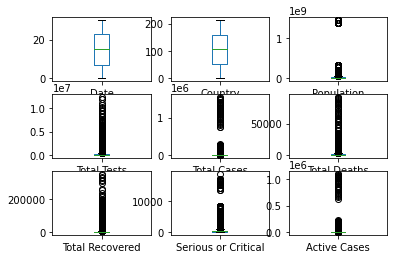

In [38]:
cov.plot(kind='box',subplots=True,layout=(3,3))

Outliers can be seen in Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious,Active Cases

In [39]:
#Detecting outliers
from scipy.stats import zscore
z=np.abs(zscore(cov))
z

array([[1.67705098e+00, 1.54503887e+00, 2.08579650e+00, ...,
        2.71909784e+00, 1.00538508e+01, 9.54572314e+00],
       [1.67705098e+00, 8.45705489e-01, 7.76150267e-01, ...,
        1.21915610e-01, 2.89259093e-01, 3.60282544e-01],
       [1.67705098e+00, 1.20350397e+00, 7.34969097e-02, ...,
        3.00349543e+00, 5.33403840e+00, 1.37626428e+00],
       ...,
       [1.67705098e+00, 1.64262028e+00, 2.57640465e-01, ...,
        2.54965586e-01, 4.34126653e-17, 1.53029891e-01],
       [1.67705098e+00, 6.50542684e-02, 2.42583053e-01, ...,
        0.00000000e+00, 4.34126653e-17, 1.53014533e-01],
       [1.67705098e+00, 9.59550459e-01, 2.57705576e-01, ...,
        2.55052718e-01, 4.34126653e-17, 1.53029891e-01]])

In [40]:
threshold=3
print(np.where(z>3))

(array([   0,    0,    0,    0,    0,    2,    2,    2,    3,    5,    6,
          7,   10,   12,   12,  213,  213,  213,  213,  213,  215,  215,
        215,  216,  218,  219,  219,  220,  223,  225,  225,  426,  426,
        426,  426,  426,  428,  428,  428,  429,  431,  432,  432,  433,
        436,  438,  438,  639,  639,  639,  639,  639,  639,  641,  641,
        641,  642,  644,  645,  645,  646,  649,  651,  651,  852,  852,
        852,  852,  852,  852,  854,  854,  854,  855,  857,  858,  858,
        859,  862,  864,  864, 1065, 1065, 1065, 1065, 1065, 1065, 1066,
       1067, 1067, 1067, 1068, 1070, 1071, 1071, 1072, 1075, 1077, 1077,
       1278, 1278, 1278, 1278, 1278, 1278, 1279, 1280, 1280, 1280, 1281,
       1282, 1283, 1284, 1284, 1285, 1288, 1290, 1290, 1491, 1491, 1491,
       1491, 1491, 1491, 1492, 1493, 1493, 1493, 1494, 1495, 1496, 1497,
       1497, 1498, 1501, 1503, 1503, 1704, 1704, 1704, 1704, 1704, 1704,
       1705, 1706, 1706, 1706, 1707, 1708, 1709, 1

In [41]:
df=cov[(z<3).all(axis=1)] #removing the outliers
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
1,0,158,145927292,1.831892e+06,36793.0,313.000000,3057.000000,8.00000,33423.0
4,0,200,67844241,4.604370e+05,114217.0,15464.000000,5855.424185,1559.00000,98409.0
8,0,197,84230075,5.989330e+05,82329.0,1890.000000,10453.000000,1894.00000,69986.0
9,0,93,83862642,3.301370e+05,80868.0,5031.000000,55987.000000,3513.00000,19850.0
11,0,152,32915899,1.358950e+05,14420.0,348.000000,6684.000000,117.00000,7388.0
...,...,...,...,...,...,...,...,...,...
6598,30,182,9874,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0
6599,30,209,595462,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0
6600,30,5,14987,2.167252e+05,3.0,1416.252096,3.000000,386.74836,0.0
6601,30,110,2140235,2.167252e+05,1.0,1416.252096,5855.424185,386.74836,1.0


In [42]:
cov.shape

(6603, 9)

In [43]:
df.shape

(6272, 9)

331 rows have been removed

In [44]:
#checking skewness
df.skew()

Date                   0.008158
Country               -0.011884
Population             3.880217
Total Tests            3.860036
Total Cases            5.183936
Total Deaths           6.225914
Total Recovered        6.921157
Serious or Critical    4.274869
Active Cases           6.120409
dtype: float64

In [45]:
#Treating skewness via log method
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

<ipython-input-45-daa4fbe8e966>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=np.log1p(df[col])


In [46]:
#Again checking the skewness
df.skew()

Date                   0.008158
Country               -0.011884
Population            -0.794105
Total Tests           -0.647380
Total Cases           -0.018856
Total Deaths           0.143726
Total Recovered        0.064313
Serious or Critical   -0.367581
Active Cases          -0.080849
dtype: float64

# Model Training

In [47]:
#Splitting data into input and output variable
x=df.drop(['Total Deaths'],axis=1)
x.head()

,Date,Country,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases
1,0,158,18.798619,14.420860,10.513090,8.025516,2.197225,10.417029
4,0,200,18.032725,13.039933,11.645864,8.675294,7.352441,11.496898
8,0,197,18.249063,13.302907,11.318491,9.254740,7.546974,11.156065
9,0,93,18.244691,12.707266,11.300586,10.932893,8.164510,9.896010
11,0,152,17.309466,11.819645,9.576441,8.807621,4.770685,8.907748


In [48]:
#scaling the input data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [49]:
x=pd.DataFrame(x)

In [50]:
x.columns=['Date','Country','Population','Total Tests','Total Cases','Total Recovered','Serious or Critical','Active Cases']

In [51]:
x.head()

,Date,Country,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases
0,-1.66881,0.852568,1.534393,1.815240,1.741439,1.133612,-0.887306,1.854618
1,-1.66881,1.535750,1.223324,1.239055,2.195028,1.405088,1.612795,2.245100
2,-1.66881,1.486951,1.311190,1.348779,2.063940,1.647180,1.707136,2.121855
3,-1.66881,-0.204739,1.309414,1.100251,2.056771,2.348310,2.006620,1.666217
4,-1.66881,0.754970,0.929570,0.729896,1.366383,1.460374,0.360732,1.308859


In [52]:
#target column
y=df['Total Deaths'].values
y

array([5.74939299, 9.64633469, 7.54486107, ..., 7.25647513, 7.25647513,
       7.25647513])

In [53]:
#Checking the shape of input and output variable
x.shape

(6272, 8)

In [54]:
y.shape

(6272,)

In [55]:
#Importing all the libraries,metrices required for ML 
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [56]:
#splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42) 

In [57]:
#checking the shape of training and testing data
print(x_train.shape,x_test.shape)

(5017, 8) (1255, 8)


In [58]:
print(y_train.shape,y_test.shape)

(5017,) (1255,)


In [59]:
#All algorithms using loop
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(), GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    Score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',Score)
    print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
    print('Mean Squared Error:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('****************************************')
    print('\n')

Score of LinearRegression() is: 0.17597743999385318
Mean Absolute Error: 1.7586937430290819
Mean Squared Error: 4.599009377392863
RMSE: 2.144530106431911
r2_score: 0.1827160474275067
****************************************


Score of Lasso() is: 0.0
Mean Absolute Error: 2.089178127451642
Mean Squared Error: 5.627828310792372
RMSE: 2.372304430462577
r2_score: -0.0001140221312621037
****************************************


Score of Ridge() is: 0.1759773845621273
Mean Absolute Error: 1.7586926983586706
Mean Squared Error: 4.598948995531615
RMSE: 2.144516028275754
r2_score: 0.18272677780924218
****************************************


Score of ElasticNet() is: 0.042033152224628445
Mean Absolute Error: 2.032516260024052
Mean Squared Error: 5.37703904805416
RMSE: 2.3188443345887104
r2_score: 0.04445341035125683
****************************************


Score of SVR() is: 0.4914988755499201
Mean Absolute Error: 1.0533902382808833
Mean Squared Error: 3.1057303101503653
RMSE: 1.76230823358

So DecisionTreeRegressor is working well 

In [60]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
Sc=dt.score(x_train,y_train)
pred=dt.predict(x_test)
print('Score of',dt,'is:',Sc)


Score of DecisionTreeRegressor() is: 1.0


In [61]:
#checking cross_val_score for DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
print("Mean r2_score for DecisionTreeRegressor:",cross_val_score(dt,x,y,cv=10,scoring="r2").mean())
print("Standard deviation in r2_score for DecisionTreeRegressor:",cross_val_score(dt,x,y,cv=10,scoring="r2").std())

Mean r2_score for DecisionTreeRegressor: 0.7859102982890118
Standard deviation in r2_score for DecisionTreeRegressor: 0.23765822959269473


So DecisionTreeRegressor is working well  and its neither underfitting/overfitting so we can choose it as our final model.

In [62]:
#Saving the best model
import joblib
joblib.dump(dt,'country_wide_covid19_dataset.obj')

['country_wide_covid19_dataset.obj']